In [17]:
!pip install shap

In [18]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer  # Example dataset
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import shap
import matplotlib.pyplot as plt

In [19]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [179]:
y_train = train_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]
x_train = train_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'], axis = 1)
y_test = test_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]
x_test = test_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'], axis = 1)


In [181]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Build the DNN model for multi-output regression
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(y_train.shape[1]))  # Output layer matches the number of target columns

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model on train and test data
train_loss, train_mae = model.evaluate(x_train, y_train, verbose=0)
test_loss, test_mae = model.evaluate(x_test, y_test, verbose=0)

Epoch 1/50


C:\Users\kopal\anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2069/2069 ━━━━━━━━━━━━━━━━━━━━ 40s 2ms/step - loss: 2675.0110 - mae: 20.0941 - val_loss: 1410.5938 - val_mae: 12.7614
Epoch 2/50
2069/2069 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1381.5745 - mae: 12.5074 - val_loss: 1388.5153 - val_mae: 12.2879
Epoch 3/50
2069/2069 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 1371.4800 - mae: 12.0996 - val_loss: 1389.2749 - val_mae: 12.6608
Epoch 4/50
2069/2069 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1258.7244 - mae: 11.9592 - val_loss: 1386.8887 - val_mae: 12.3906
Epoch 5/50
2069/2069 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 1274.3859 - mae: 11.9147 - val_loss: 1399.6404 - val_mae: 13.3161
Epoch 6/50
2069/2069 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1331.6818 - mae: 12.0187 - val_loss: 1384.2708 - val_mae: 12.2841
Epoch 7/50
2069/2069 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1260.9725 - mae: 11.8716 - val_loss: 1385.3423 - val_mae: 12.5182
Epoch 8/50
2069/2069 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 1303.7808 - mae: 11.8999 - val_loss: 1388.7512 - val

In [182]:
print(f'Train MAE: {train_mae:.2f}')
print(f'Test MAE: {test_mae:.2f}')

# Predict on test data
y_pred = model.predict(x_test)

# Calculate metrics for each target column
mape_scores = []
mae_scores = []
rmse_scores = []
r2_scores = []

Train MAE: 11.98
Test MAE: 14.24
1007/1007 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [183]:
for i in range(y_test.shape[1]):
    mape = mean_absolute_percentage_error(y_test.iloc[:, i], y_pred[:, i])
    mae = mean_absolute_error(y_test.iloc[:, i], y_pred[:, i])
    rmse = np.sqrt(mean_squared_error(y_test.iloc[:, i], y_pred[:, i]))
    r2 = r2_score(y_test.iloc[:, i], y_pred[:, i])

    mape_scores.append(mape)
    mae_scores.append(mae)
    rmse_scores.append(rmse)
    r2_scores.append(r2)

    print(f'Target {i + 1} - MAPE: {mape:.2f}, MAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}')


Target 1 - MAPE: 1221112292361.15, MAE: 0.00, RMSE: 0.00, R²: 0.00
Target 2 - MAPE: 0.15, MAE: 18.50, RMSE: 22.89, R²: 0.91
Target 3 - MAPE: 0.12, MAE: 11.00, RMSE: 13.48, R²: 0.97
Target 4 - MAPE: 58674981534875824.00, MAE: 33.56, RMSE: 78.28, R²: 0.00
Target 5 - MAPE: 12957342718933658.00, MAE: 7.12, RMSE: 34.45, R²: 0.00
Target 6 - MAPE: 34522813212708720.00, MAE: 17.72, RMSE: 32.82, R²: 0.01
Target 7 - MAPE: 821836269161719.12, MAE: 0.31, RMSE: 2.94, R²: -0.00
Target 8 - MAPE: 79938533278445856.00, MAE: 39.95, RMSE: 68.18, R²: -0.01
Target 9 - MAPE: 6819415230634.84, MAE: 0.00, RMSE: 0.00, R²: 0.00


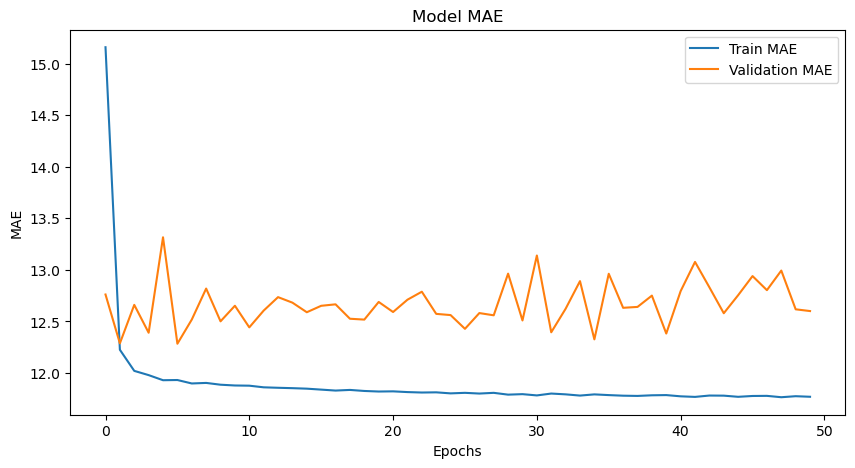

In [184]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

In [185]:
!pip install --upgrade shap

In [186]:
for i, sv in enumerate(shap_values):
    print(f'SHAP values for output {i}: {sv.shape}')

SHAP values for output 0: (35, 1)
SHAP values for output 1: (35, 1)
SHAP values for output 2: (35, 1)
SHAP values for output 3: (35, 1)
SHAP values for output 4: (35, 1)
SHAP values for output 5: (35, 1)
SHAP values for output 6: (35, 1)
SHAP values for output 7: (35, 1)
SHAP values for output 8: (35, 1)
SHAP values for output 9: (35, 1)


C:\Users\kopal\anaconda\Lib\site-packages\shap\explainers\_deep\deep_tf.py:99: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn("Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.")
C:\Users\kopal\anaconda\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: keras_tensor_21. Received: the structure of inputs=['*']
  warnings.warn(


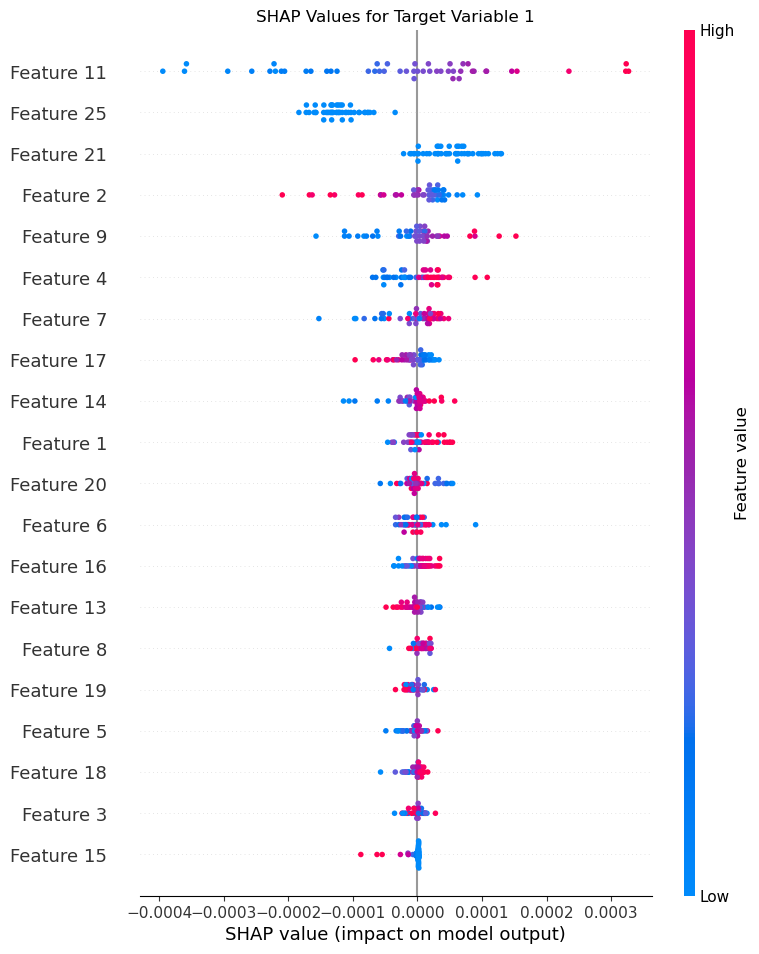

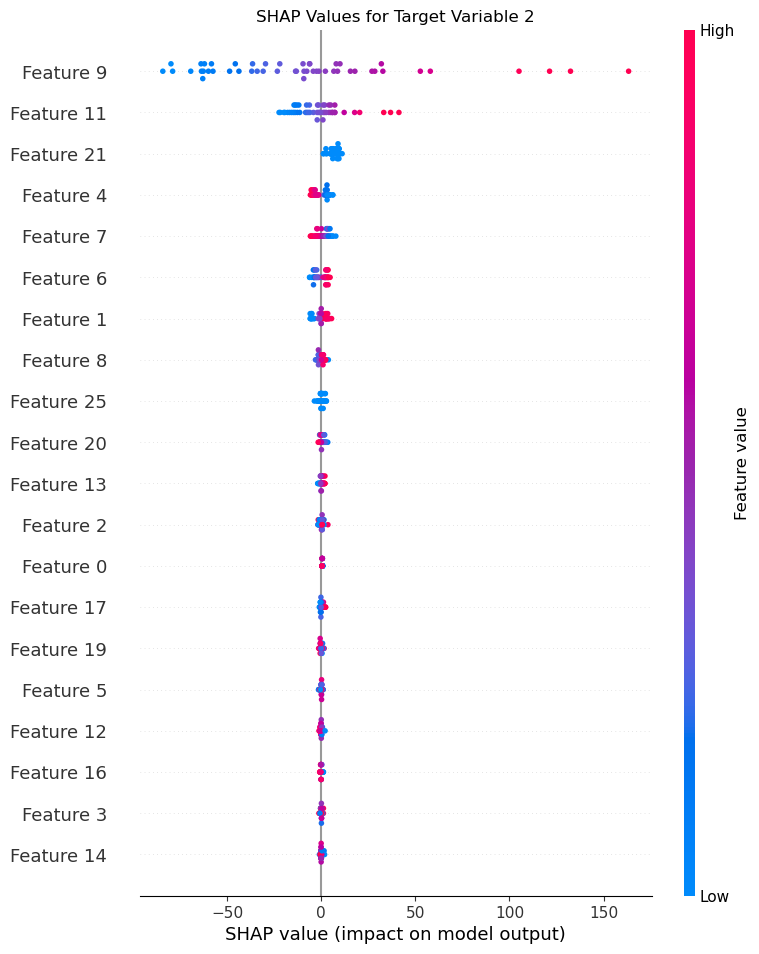

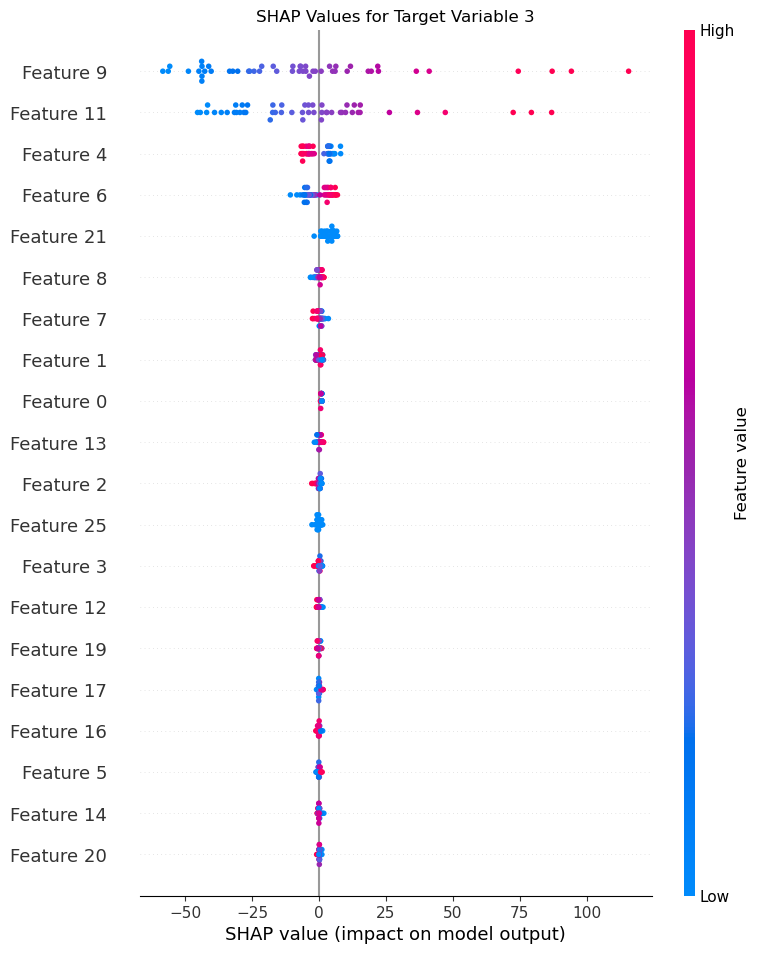

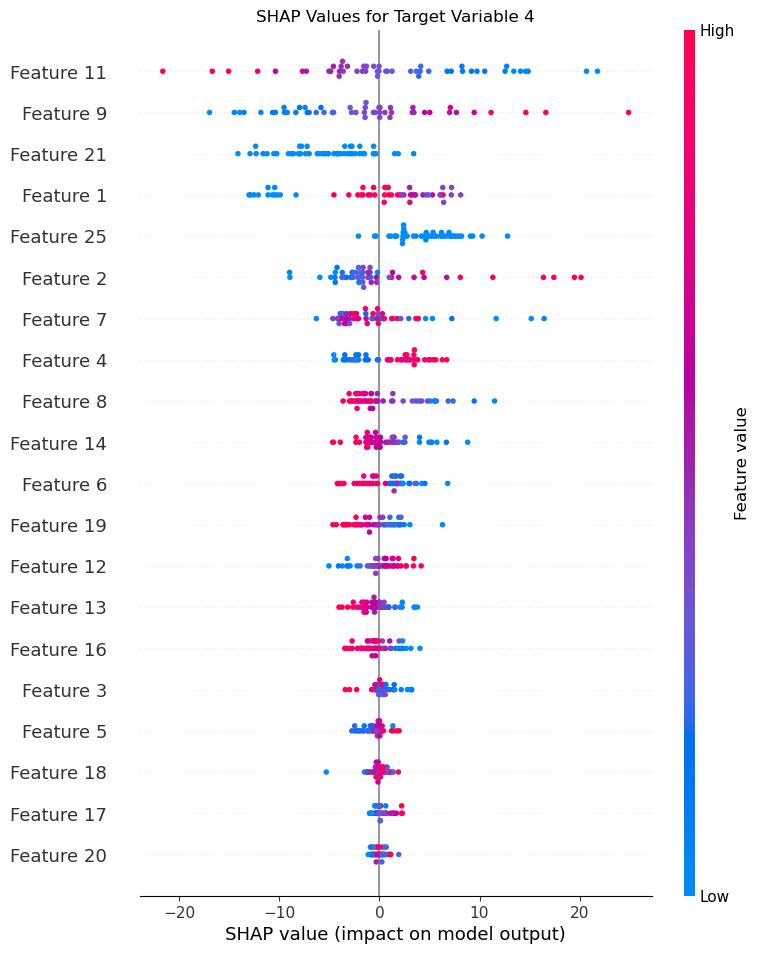

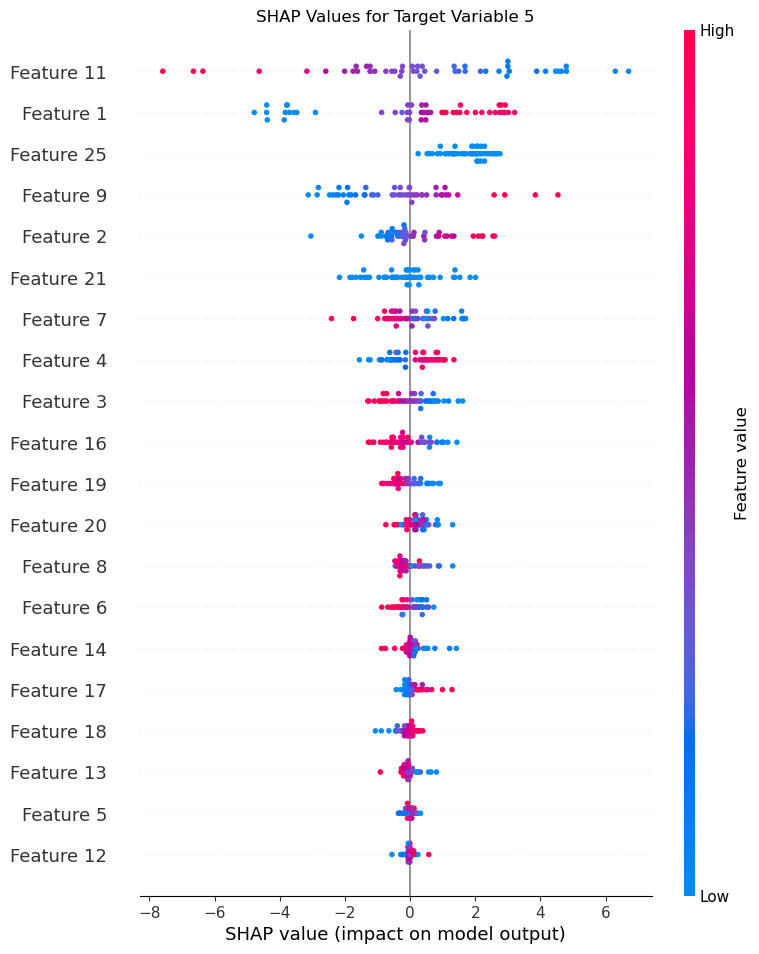

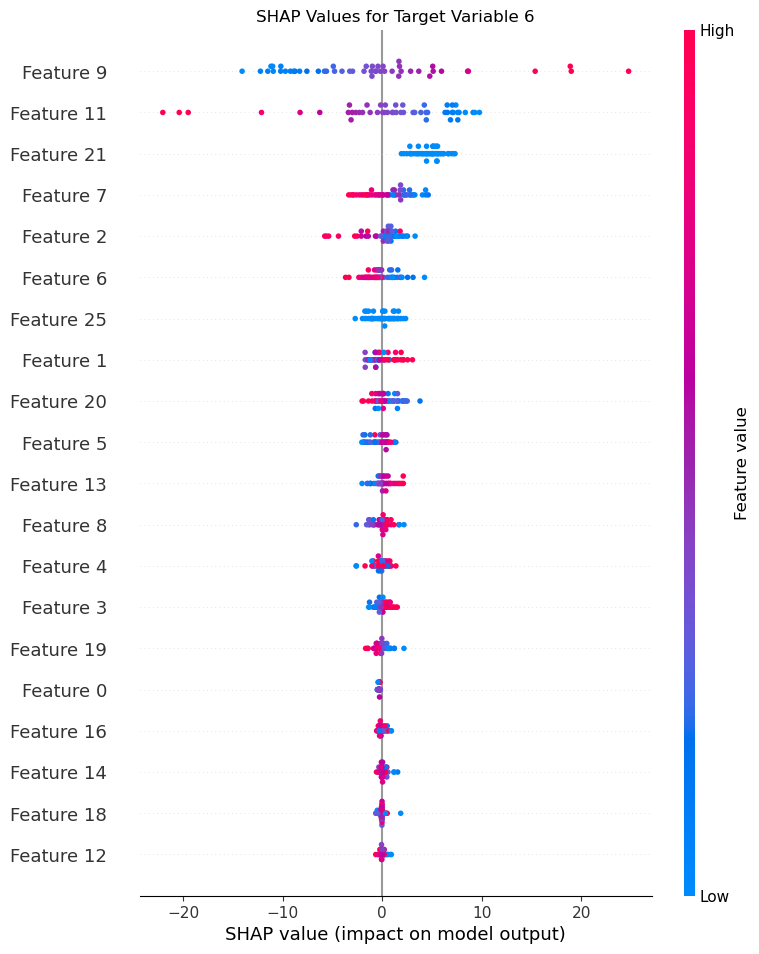

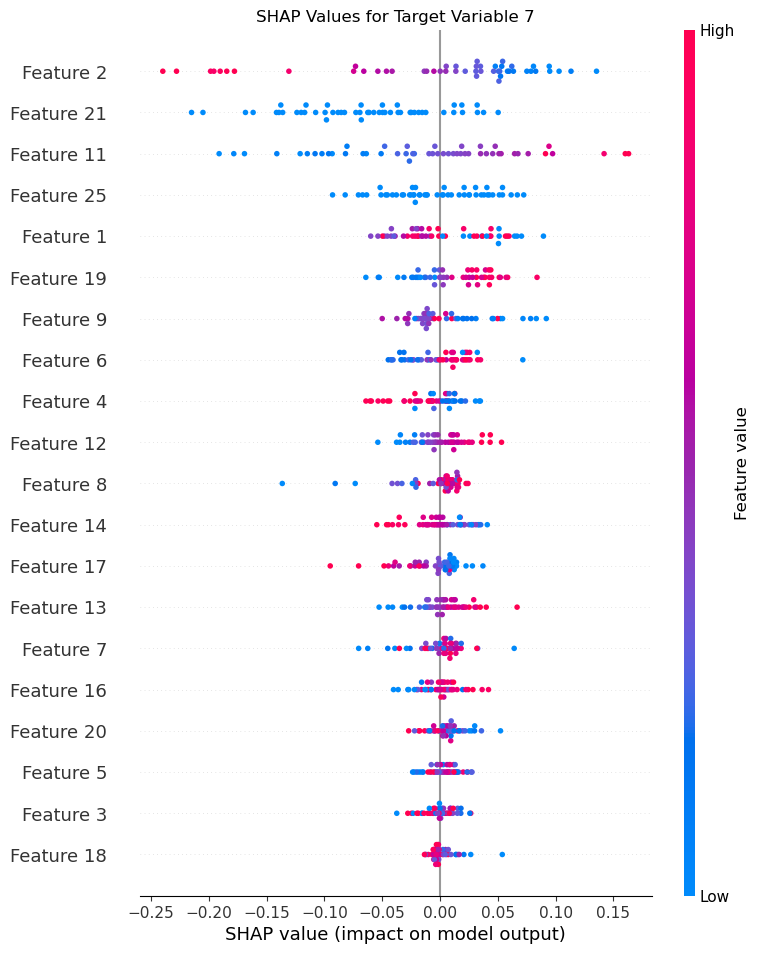

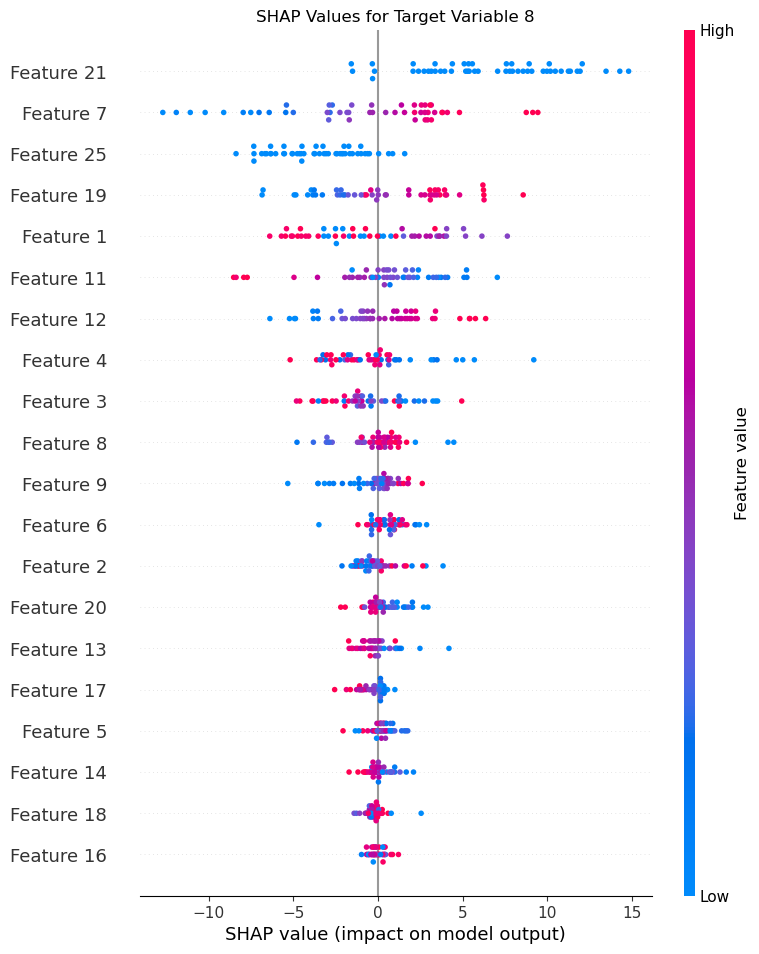

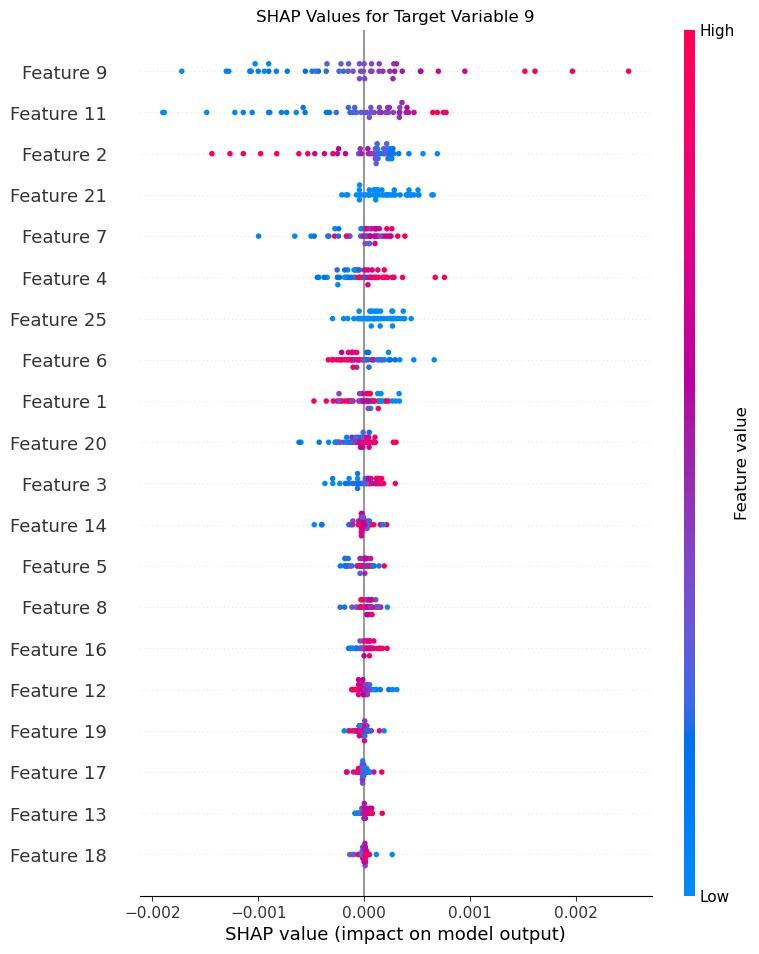

In [187]:
explainer = shap.DeepExplainer(model, x_train[:100])  # Use a subset for speed

# Compute SHAP values (this can take some time)
shap_values = explainer.shap_values(x_test[:50])  # Use a subset of test data for speed

# Plot SHAP Summary Plot for Each Target
for i in range(9):
    plt.figure(figsize=(10, 6))
    shap.summary_plot(shap_values[:, :, i], x_test[:50], show=False)  # Plot for target i
    plt.title(f'SHAP Values for Target Variable {i + 1}')  # Optional: Custom title
    plt.show()

In [188]:
y_train = train_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]
x_train = train_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'], axis = 1)
y_test = test_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]
x_test = test_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'], axis = 1)


In [189]:
y_pred = pd.DataFrame(y_pred,  columns = ['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['DepDelayMinutes']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['DepDelayMinutes']]
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Build a Deep Neural Network Model for Regression
model = Sequential()
model.add(Dense(64, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Single output for regression

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate model on Train and Test Data
train_mae = model.evaluate(x_train, y_train, verbose=0)[1]
test_mae = model.evaluate(x_test, y_test, verbose=0)[1]

Epoch 1/50


C:\Users\kopal\anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2069/2069 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 5566.9819 - mae: 34.1260 - val_loss: 24.3633 - val_mae: 3.1709
Epoch 2/50
2069/2069 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 13.0358 - mae: 2.3243 - val_loss: 6.5458 - val_mae: 1.3999
Epoch 3/50
2069/2069 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 4.4717 - mae: 1.1765 - val_loss: 3.2680 - val_mae: 0.9811
Epoch 4/50
2069/2069 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 2.4662 - mae: 0.9183 - val_loss: 2.3637 - val_mae: 0.8243
Epoch 5/50
2069/2069 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 2.3644 - mae: 0.8501 - val_loss: 1.4870 - val_mae: 0.5224
Epoch 6/50
2069/2069 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 2.4596 - mae: 0.8293 - val_loss: 51.3631 - val_mae: 5.5442
Epoch 7/50
2069/2069 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 2.8217 - mae: 0.7924 - val_loss: 1.1551 - val_mae: 0.4101
Epoch 8/50
2069/2069 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.2166 - mae: 0.5738 - val_loss: 2.4016 - val_mae: 0.8824
Epoch 9/50
2069/2069 ━━━━━━━━━━━━━━━━━━━━ 5s

Train MAE: 0.27
Test MAE: 58.80
1007/1007 ━━━━━━━━━━━━━━━━━━━━ 1s 927us/step
MAPE: 33606923330933212.00
MAE: 58.80
RMSE: 108.69
R²: 0.01


C:\Users\kopal\anaconda\Lib\site-packages\shap\explainers\_deep\deep_tf.py:99: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn("Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.")
C:\Users\kopal\anaconda\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: keras_tensor_28. Received: the structure of inputs=['*']
  warnings.warn(


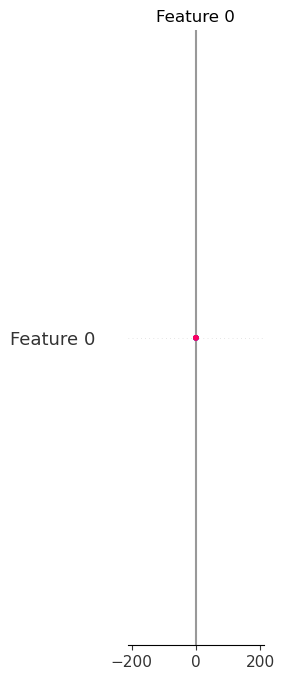

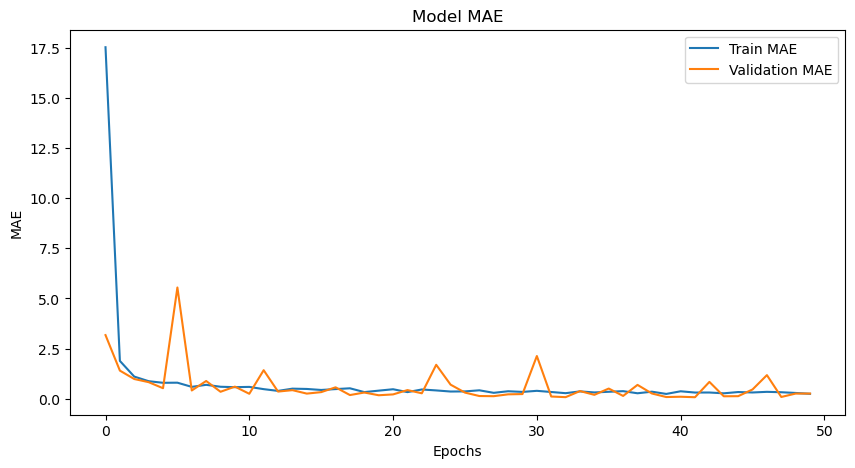

In [190]:
print(f'Train MAE: {train_mae:.2f}')
print(f'Test MAE: {test_mae:.2f}')

# Predict on Test Data
y_pred = model.predict(x_test).flatten()

# Calculate Regression Metrics
mape = mean_absolute_percentage_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'MAPE: {mape:.2f}')
print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'R²: {r2:.2f}')
explainer = shap.DeepExplainer(model, x_train[:100])  # Limit to 100 samples for speed
shap_values = explainer.shap_values(x_test[:10])  # Limit to 10 samples for visualization

# Plot Feature Importance
shap.summary_plot(shap_values, x_test[:10])

# Plot Training History (MAE vs Epochs)
plt.figure(figsize=(10, 5))
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

In [191]:
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Input
import shap

In [204]:
y_train = train_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]
x_train = train_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'], axis = 1)
y_test = test_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]
x_test = test_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'], axis = 1)


scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
# Build a Convolutional Neural Network (CNN) Model for Regression
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Single output for regression

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate model on Train and Test Data
train_mae = model.evaluate(x_train, y_train, verbose=0)[1]

IndexError: tuple index out of range

In [ ]:
test_mae = model.evaluate(x_test, y_test, verbose=0)[1]

print(f'Train MAE: {train_mae:.2f}')
print(f'Test MAE: {test_mae:.2f}')
for i in range(y_test.shape[1]):
    mape = mean_absolute_percentage_error(y_test.iloc[:, i], y_pred[:, i])
    mae = mean_absolute_error(y_test.iloc[:, i], y_pred[:, i])
    rmse = np.sqrt(mean_squared_error(y_test.iloc[:, i], y_pred[:, i]))
    r2 = r2_score(y_test.iloc[:, i], y_pred[:, i])

    print(f'Target {i + 1} - MAPE: {mape:.2f}, MAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}')

# Plot Training History
plt.figure(figsize=(10, 5))
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE over Epochs')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

In [ ]:
explainer = shap.DeepExplainer(model, x_train[:100])  # Use a subset for speed

# Compute SHAP values (this can take some time)
shap_values = explainer.shap_values(x_test[:50])  # Use a subset of test data for speed

# Plot SHAP Summary Plot for Each Target
for i in range(9):
    plt.figure(figsize=(10, 6))
    shap.summary_plot(shap_values[:, :, i], x_test[:50], show=False)  # Plot for target i
    plt.title(f'SHAP Values for Target Variable {i + 1}')  # Optional: Custom title
    plt.show()

In [ ]:
y_train = train_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]
x_train = train_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'], axis = 1)
y_test = test_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]
x_test = test_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'], axis = 1)



In [ ]:
y_pred = pd.DataFrame(y_pred,  columns = ['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['DepDelayMinutes']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['DepDelayMinutes']]


scaler = StandardScaler()
x_train = scaler.fit_transform(x_train.reshape(-1, x_train.shape[2])).reshape(x_train.shape)
x_test = scaler.transform(x_test.reshape(-1, x_test.shape[2])).reshape(x_test.shape)

# Build a Convolutional Neural Network (CNN) Model for Regression
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Single output for regression

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate model on Train and Test Data
train_mae = model.evaluate(x_train, y_train, verbose=0)[1]


In [ ]:
test_mae = model.evaluate(x_test, y_test, verbose=0)[1]

print(f'Train MAE: {train_mae:.2f}')
print(f'Test MAE: {test_mae:.2f}')

# Predict on Test Data
y_pred = model.predict(x_test).flatten()

# Calculate Regression Metrics
mape = mean_absolute_percentage_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'MAPE: {mape:.2f}')
print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'R²: {r2:.2f}')

explainer = shap.DeepExplainer(model, x_train[:100])  # Limit to 100 samples for speed
shap_values = explainer.shap_values(x_test[:10])  # Limit to 10 samples for visualization

# Plot Feature Importance
shap.summary_plot(shap_values, x_test[:10].reshape(-1, x_test.shape[1]), feature_names=data.feature_names)

# Plot Training History (MAE vs Epochs)
plt.figure(figsize=(10, 5))
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

In [220]:
from tensorflow.keras.layers import LSTM, Dense
y_train = train_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]
x_train = train_df.drop(['DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'], axis = 1)
y_test = test_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]
x_test = test_df.drop(['DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'], axis = 1)


In [222]:
x = pd.concat([x_train, x_test], axis=0, ignore_index=True)
y = pd.concat([y_train, y_test], axis=0, ignore_index=True)

In [224]:
data = x.values
targets = y.values

In [226]:
timesteps = 10

# Create sequences of data and targets
def create_sequences(data, targets, timesteps):
    x, y = [], []
    for i in range(len(data) - timesteps + 1):
        x.append(data[i:i + timesteps])  # A sequence of 'timesteps' length
        y.append(targets[i + timesteps - 1])  # Target for the last step in the sequence
    return np.array(x), np.array(y)

x_train, y_train = create_sequences(data, targets, timesteps)

In [228]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
# Build an LSTM Model for Regression
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(x_train.shape[1], x_train.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu'))
model.add(Dense(1))  # Single output for regression

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate model on Train and Test Data
train_mae = model.evaluate(x_train, y_train, verbose=0)[1]
test_mae = model.evaluate(x_test, y_test, verbose=0)[1]


ValueError: could not convert string to float: '2022-01-01'

In [ ]:
print(f'Train MAE: {train_mae:.2f}')
print(f'Test MAE: {test_mae:.2f}')

# Predict on Test Data
y_pred = model.predict(x_test).flatten()
for i in range(y_test.shape[1]):
    mape = mean_absolute_percentage_error(y_test.iloc[:, i], y_pred[:, i])
    mae = mean_absolute_error(y_test.iloc[:, i], y_pred[:, i])
    rmse = np.sqrt(mean_squared_error(y_test.iloc[:, i], y_pred[:, i]))
    r2 = r2_score(y_test.iloc[:, i], y_pred[:, i])

    print(f'Target {i + 1} - MAPE: {mape:.2f}, MAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}')

# Plot Training History
plt.figure(figsize=(10, 5))
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE over Epochs')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()



In [ ]:
explainer = shap.DeepExplainer(model, x_train[:100])  # Use a subset for speed

# Compute SHAP values (this can take some time)
shap_values = explainer.shap_values(x_test[:50])  # Use a subset of test data for speed

# Plot SHAP Summary Plot for Each Target
for i in range(9):
    plt.figure(figsize=(10, 6))
    shap.summary_plot(shap_values[:, :, i], x_test[:50], show=False)  # Plot for target i
    plt.title(f'SHAP Values for Target Variable {i + 1}')  # Optional: Custom title
    plt.show()

In [ ]:
y_train = train_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]
x_train = train_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'], axis = 1)
y_test = test_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]
x_test = test_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'], axis = 1)

y_pred = pd.DataFrame(y_pred,  columns = ['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['DepDelayMinutes']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['DepDelayMinutes']]

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train.reshape(-1, x_train.shape[2])).reshape(x_train.shape)
x_test = scaler.transform(x_test.reshape(-1, x_test.shape[2])).reshape(x_test.shape)

# Build an LSTM Model for Regression
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(x_train.shape[1], x_train.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu'))
model.add(Dense(1))  # Single output for regression

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate model on Train and Test Data
train_mae = model.evaluate(x_train, y_train, verbose=0)[1]
test_mae = model.evaluate(x_test, y_test, verbose=0)[1]

In [ ]:
print(f'Train MAE: {train_mae:.2f}')
print(f'Test MAE: {test_mae:.2f}')

# Predict on Test Data
y_pred = model.predict(x_test).flatten()

# Calculate Regression Metrics
mape = mean_absolute_percentage_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'MAPE: {mape:.2f}')
print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'R²: {r2:.2f}')

# Feature Importance using SHAP
explainer = shap.DeepExplainer(model, x_train[:100])  # Limit to 100 samples for speed
shap_values = explainer.shap_values(x_test[:10]) 

shap.summary_plot(shap_values, x_test[:10].reshape(-1, x_test.shape[1]), feature_names=data.feature_names)

# Plot Training History (MAE vs Epochs)
plt.figure(figsize=(10, 5))
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()


In [210]:
y_train = train_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]
x_train = train_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'], axis = 1)
y_test = test_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]
x_test = test_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'], axis = 1)
from tensorflow.keras.layers import GRU, Dense

In [218]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
model = Sequential()
model.add(GRU(50, activation='relu', input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dense(y_train.shape[1]))  # Output layer matches the number of target columns

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model on train and test data
train_loss, train_mae = model.evaluate(x_train, y_train, verbose=0)
test_loss, test_mae = model.evaluate(x_test, y_test, verbose=0)
print(f'Train MAE: {train_mae:.2f}, Test MAE: {test_mae:.2f}')

# Predict on test data
y_pred = model.predict(x_test)


IndexError: tuple index out of range

In [ ]:
for i in range(y_test.shape[1]):
    mape = mean_absolute_percentage_error(y_test.iloc[:, i], y_pred[:, i])
    mae = mean_absolute_error(y_test.iloc[:, i], y_pred[:, i])
    rmse = np.sqrt(mean_squared_error(y_test.iloc[:, i], y_pred[:, i]))
    r2 = r2_score(y_test.iloc[:, i], y_pred[:, i])

    print(f'Target {i + 1} - MAPE: {mape:.2f}, MAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}')

# Plot Training History
plt.figure(figsize=(10, 5))
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE over Epochs')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

# Initialize SHAP Explainer
explainer = shap.KernelExplainer(model.predict, x_train[:100])  # Use a subset for speed


In [ ]:
explainer = shap.DeepExplainer(model, x_train[:100])  # Use a subset for speed

# Compute SHAP values (this can take some time)
shap_values = explainer.shap_values(x_test[:50])  # Use a subset of test data for speed

# Plot SHAP Summary Plot for Each Target
for i in range(9):
    plt.figure(figsize=(10, 6))
    shap.summary_plot(shap_values[:, :, i], x_test[:50], show=False)  # Plot for target i
    plt.title(f'SHAP Values for Target Variable {i + 1}')  # Optional: Custom title
    plt.show()

In [ ]:
y_train = train_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]
x_train = train_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'], axis = 1)
y_test = test_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]
x_test = test_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'], axis = 1)


y_pred = pd.DataFrame(y_pred,  columns = ['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['DepDelayMinutes']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['DepDelayMinutes']]
model = Sequential()
model.add(GRU(50, activation='relu', input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dense(1))  # Single output

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model on train and test data
train_loss, train_mae = model.evaluate(x_train, y_train, verbose=0)
test_loss, test_mae = model.evaluate(x_test, y_test, verbose=0)
print(f'Train MAE: {train_mae:.2f}, Test MAE: {test_mae:.2f}')

# Predict on test data
y_pred = model.predict(x_test)


In [ ]:
mape = mean_absolute_percentage_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'Single Output - MAPE: {mape:.2f}, MAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}')

# Plot Training History
plt.figure(figsize=(10, 5))
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE over Epochs')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

# Initialize SHAP Explainer
explainer = shap.DeepExplainer(model, x_train[:100])  # Use a subset for speed
shap_values = explainer.shap_values(x_test[:50])  # Use a subset of test data for speed

# Plot SHAP Summary Plot
print("SHAP Summary Plot for Single Output")
shap.summary_plot(shap_values, x_test[:50], feature_names=[f'Feature {j}' for j in range(x_test.shape[1])])

In [ ]:
y_train = train_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]
x_train = train_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'], axis = 1)
y_test = test_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]
x_test = test_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'], axis = 1)

from tensorflow.keras.layers import Bidirectional, GRU, Dense

In [ ]:
model = Sequential()
model.add(Bidirectional(GRU(50, activation='relu'), input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dense(y_train.shape[1]))  # Output layer matches the number of target columns

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model on train and test data
train_loss, train_mae = model.evaluate(x_train, y_train, verbose=0)
test_loss, test_mae = model.evaluate(x_test, y_test, verbose=0)
print(f'Train MAE: {train_mae:.2f}, Test MAE: {test_mae:.2f}')

# Predict on test data
y_pred = model.predict(x_test)

In [ ]:
for i in range(y_test.shape[1]):
    mape = mean_absolute_percentage_error(y_test.iloc[:, i], y_pred[:, i])
    mae = mean_absolute_error(y_test.iloc[:, i], y_pred[:, i])
    rmse = np.sqrt(mean_squared_error(y_test.iloc[:, i], y_pred[:, i]))
    r2 = r2_score(y_test.iloc[:, i], y_pred[:, i])

    print(f'Target {i + 1} - MAPE: {mape:.2f}, MAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}')

# Plot Training History
plt.figure(figsize=(10, 5))
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE over Epochs')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

In [ ]:
explainer = shap.DeepExplainer(model, x_train[:100])  # Use a subset for speed

# Compute SHAP values (this can take some time)
shap_values = explainer.shap_values(x_test[:50])  # Use a subset of test data for speed

# Plot SHAP Summary Plot for Each Target
for i in range(9):
    plt.figure(figsize=(10, 6))
    shap.summary_plot(shap_values[:, :, i], x_test[:50], show=False)  # Plot for target i
    plt.title(f'SHAP Values for Target Variable {i + 1}')  # Optional: Custom title
    plt.show()

In [ ]:
y_train = train_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]
x_train = train_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'], axis = 1)
y_test = test_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]
x_test = test_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'], axis = 1)


y_pred = pd.DataFrame(y_pred,  columns = ['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['DepDelayMinutes']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['DepDelayMinutes']]
model = Sequential()
model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dense(1))  # Single output

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model on train and test data
train_loss, train_mae = model.evaluate(x_train, y_train, verbose=0)
test_loss, test_mae = model.evaluate(x_test, y_test, verbose=0)
print(f'Train MAE: {train_mae:.2f}, Test MAE: {test_mae:.2f}')

# Predict on test data
y_pred = model.predict(x_test)

# Calculate metrics
mape = mean_absolute_percentage_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'Single Output - MAPE: {mape:.2f}, MAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}')

# Plot Training History
plt.figure(figsize=(10, 5))
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE over Epochs')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

# Initialize SHAP Explainer
explainer = shap.DeepExplainer(model, x_train[:100])  # Use a subset for speed
shap_values = explainer.shap_values(x_test[:50])  # Use a subset of test data for speed

# Plot SHAP Summary Plot
print("SHAP Summary Plot for Single Output")
shap.summary_plot(shap_values, x_test[:50], feature_names=[f'Feature {j}' for j in range(x_test.shape[1])])


In [ ]:
y_train = train_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]
x_train = train_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'], axis = 1)
y_test = test_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]
x_test = test_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'], axis = 1)
model = Sequential()
model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dense(y_train.shape[1]))  # Output layer matches the number of target columns

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model on train and test data
train_loss, train_mae = model.evaluate(x_train, y_train, verbose=0)
test_loss, test_mae = model.evaluate(x_test, y_test, verbose=0)
print(f'Train MAE: {train_mae:.2f}, Test MAE: {test_mae:.2f}')

# Predict on test data
y_pred = model.predict(x_test)

In [ ]:
for i in range(y_test.shape[1]):
    mape = mean_absolute_percentage_error(y_test.iloc[:, i], y_pred[:, i])
    mae = mean_absolute_error(y_test.iloc[:, i], y_pred[:, i])
    rmse = np.sqrt(mean_squared_error(y_test.iloc[:, i], y_pred[:, i]))
    r2 = r2_score(y_test.iloc[:, i], y_pred[:, i])

    print(f'Target {i + 1} - MAPE: {mape:.2f}, MAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}')

# Plot Training History
plt.figure(figsize=(10, 5))
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE over Epochs')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

In [ ]:
explainer = shap.DeepExplainer(model, x_train[:100])  # Use a subset for speed

# Compute SHAP values (this can take some time)
shap_values = explainer.shap_values(x_test[:50])  # Use a subset of test data for speed

# Plot SHAP Summary Plot for Each Target
for i in range(9):
    plt.figure(figsize=(10, 6))
    shap.summary_plot(shap_values[:, :, i], x_test[:50], show=False)  # Plot for target i
    plt.title(f'SHAP Values for Target Variable {i + 1}')  # Optional: Custom title
    plt.show()

In [ ]:

y_train = train_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]
x_train = train_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'], axis = 1)
y_test = test_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]
x_test = test_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'], axis = 1)

y_pred = pd.DataFrame(y_pred,  columns = ['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['DepDelayMinutes']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['DepDelayMinutes']]
model = Sequential()
model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dense(1))  # Single output

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model on train and test data
train_loss, train_mae = model.evaluate(x_train, y_train, verbose=0)
test_loss, test_mae = model.evaluate(x_test, y_test, verbose=0)
print(f'Train MAE: {train_mae:.2f}, Test MAE: {test_mae:.2f}')

# Predict on test data
y_pred = model.predict(x_test)

In [ ]:
mape = mean_absolute_percentage_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'Single Output - MAPE: {mape:.2f}, MAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}')

# Plot Training History
plt.figure(figsize=(10, 5))
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE over Epochs')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

# Initialize SHAP Explainer
explainer = shap.DeepExplainer(model, x_train[:100])  # Use a subset for speed
shap_values = explainer.shap_values(x_test[:50])  # Use a subset of test data for speed

# Plot SHAP Summary Plot
print("SHAP Summary Plot for Single Output")
shap.summary_plot(shap_values, x_test[:50], feature_names=[f'Feature {j}' for j in range(x_test.shape[1])])

In [ ]:
def create_resnet_multi_output(input_shape, output_dim):
    inputs = Input(shape=input_shape)
    x = Conv2D(64, (7, 1), strides=(2, 1), padding='same')(inputs)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    
    x = Conv2D(64, (3, 1), padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    
    # Add multiple residual blocks
    for _ in range(3):  # You can add more blocks as needed
        x = residual_block(x, 64)

    x = GlobalAveragePooling2D()(x)
    x = Dense(output_dim)(x)  # Output layer matches the number of target columns
    
    model = Model(inputs=inputs, outputs=x)
    return model

In [ ]:
y_train = train_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]
x_train = train_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'], axis = 1)
y_test = test_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]
x_test = test_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'], axis = 1)

output_dim = 2  # Change to match your number of targets
model_multi = create_resnet_multi_output(input_shape, output_dim)
model_multi.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
y_multi = data[['target', 'target2']]  # Replace with your multi-target DataFrame
model_multi.fit(X_train, y_multi, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, mae = model_multi.evaluate(X_test, y_test)  # Change to appropriate test labels
print(f'Multi Output - Loss: {loss:.4f}, MAE: {mae:.4f}')

In [ ]:
y_pred = pd.DataFrame(y_pred,  columns = ['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['DepDelayMinutes']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['DepDelayMinutes']]
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, ReLU, Add, GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

def residual_block(x, filters):
    shortcut = x
    x = Conv2D(filters, (3, 1), padding='same')(x)  # Adjusted for the shape of input
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = Conv2D(filters, (3, 1), padding='same')(x)
    x = BatchNormalization()(x)
    
    # Shortcut connection
    x = Add()([x, shortcut])
    x = ReLU()(x)
    return x

In [ ]:
def create_resnet_single_output(input_shape):
    inputs = Input(shape=input_shape)
    x = Conv2D(64, (7, 1), strides=(2, 1), padding='same')(inputs)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    
    x = Conv2D(64, (3, 1), padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    
    # Add multiple residual blocks
    for _ in range(3):  # You can add more blocks as needed
        x = residual_block(x, 64)

    x = GlobalAveragePooling2D()(x)
    x = Dense(1)(x)  # Single output for regression
    
    model = Model(inputs=inputs, outputs=x)
    return model


In [ ]:
input_shape = (10, 1, 1)  # Reshape the input to match the model's expectations
model_single = create_resnet_single_output(input_shape)
model_single.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
model_single.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, mae = model_single.evaluate(X_test, y_test)
print(f'Single Output - Loss: {loss:.4f}, MAE: {mae:.4f}')